In [47]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')



In [48]:

df_india = pd.read_csv("StatewiseTestingDetails.csv") 
df_vaccine= pd.read_csv("covid_19_india.csv")
df_statewise = pd.read_csv("covid_vaccine_statewise.csv")

In [49]:
files=["covid_19_india.csv ","covid_vaccine_statewise.csv","StatewiseTestingDetails.csv"]
df=pd.DataFrame()
for file in files:
    data=pd.read_csv(file)
    df=pd.concat([df,data],axis=0)
    df.to_csv("merged_files.csv",index=False)

In [50]:
df=pd.read_csv('merged_files.csv')

In [5]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Updated On,...,18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated,TotalSamples,Negative,Positive
0,1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2020-01-31,6:00 PM,Kerala,1,0,0.0,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,2020-02-01,6:00 PM,Kerala,2,0,0.0,0.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,2020-02-02,6:00 PM,Kerala,3,0,0.0,0.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,2020-02-03,6:00 PM,Kerala,3,0,0.0,0.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16336 entries, 0 to 16335
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          16336 non-null  object 
 1   State         16336 non-null  object 
 2   TotalSamples  16336 non-null  float64
 3   Negative      6969 non-null   object 
 4   Positive      5662 non-null   float64
dtypes: float64(2), object(3)
memory usage: 638.2+ KB


In [7]:
df_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [8]:
df_statewise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [9]:
df_vaccine.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [10]:
df_vaccine.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812
18109,18110,2021-08-11,8:00 AM,West Bengal,-,-,1506532,18252,1534999


In [11]:
df_vaccine['Total Doses Administered'].mode()

KeyError: 'Total Doses Administered'

In [ ]:
df_vaccine.isnull().sum()

In [ ]:
df_vaccine["Total Doses Administered"].fillna("1931.0",inplace=True)

In [12]:
df_india.describe()

,TotalSamples,Positive
count,1.633600e+04,5.662000e+03
mean,5.376466e+06,5.652654e+04
std,8.780338e+06,1.673108e+05
min,5.800000e+01,0.000000e+00
25%,1.729098e+05,5.362500e+02
50%,9.307580e+05,4.771000e+03
75%,7.284795e+06,3.361875e+04
max,6.789786e+07,1.638961e+06


In [13]:
df_vaccine.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


In [14]:
df_statewise.describe()

,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
count,7.621000e+03,7.621000e+03,7621.000000,7.621000e+03,7.621000e+03,7.461000e+03,7.461000e+03,7461.000000,7.621000e+03,7.621000e+03,...,1.702000e+03,1.702000e+03,1.702000e+03,3.733000e+03,3.734000e+03,3.734000e+03,1.600000e+02,1.600000e+02,160.000000,5.919000e+03
mean,9.188171e+06,4.792358e+05,2282.872064,7.414415e+06,1.773755e+06,3.620156e+06,3.168416e+06,1162.978019,1.044669e+06,8.126553e+06,...,8.773958e+06,7.442161e+06,5.641605e+06,1.395895e+06,2.916515e+06,2.627444e+06,4.461687e+07,3.951018e+07,12370.543750,4.547842e+06
std,3.746180e+07,1.911511e+06,7275.973730,2.995209e+07,7.570382e+06,1.737938e+07,1.515310e+07,5931.353995,4.452259e+06,3.298414e+07,...,2.660829e+07,2.225999e+07,1.681650e+07,5.501454e+06,9.567607e+06,8.192225e+06,3.950749e+07,3.417684e+07,12485.026753,1.834182e+07
min,7.000000e+00,0.000000e+00,0.000000,7.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000,0.000000e+00,7.000000e+00,...,2.662400e+04,1.681500e+04,9.994000e+03,1.059000e+03,1.136000e+03,5.580000e+02,2.375700e+04,2.451700e+04,2.000000,7.000000e+00
25%,1.356570e+05,6.004000e+03,69.000000,1.166320e+05,1.283100e+04,5.655500e+04,5.210700e+04,8.000000,0.000000e+00,1.331340e+05,...,4.344842e+05,2.326275e+05,1.285605e+05,5.655400e+04,9.248225e+04,5.615975e+04,5.739350e+06,5.023407e+06,1278.750000,7.427550e+04
50%,8.182020e+05,4.547000e+04,597.000000,6.614590e+05,1.388180e+05,3.897850e+05,3.342380e+05,113.000000,1.185100e+04,7.567360e+05,...,3.095970e+06,2.695938e+06,1.805696e+06,2.947270e+05,8.330395e+05,7.887425e+05,3.716590e+07,3.365402e+07,8007.500000,4.022880e+05
75%,6.625243e+06,3.428690e+05,1708.000000,5.387805e+06,1.166434e+06,2.735777e+06,2.561513e+06,800.000000,7.579300e+05,6.007817e+06,...,7.366241e+06,6.969726e+06,5.294763e+06,9.105160e+05,2.499280e+06,2.337874e+06,7.441663e+07,6.685368e+07,19851.000000,3.501562e+06
max,5.132284e+08,3.501031e+07,73933.000000,4.001504e+08,1.130780e+08,2.701636e+08,2.395186e+08,98275.000000,6.236742e+07,4.468251e+08,...,2.243304e+08,1.667575e+08,1.186927e+08,9.224315e+07,9.096888e+07,6.731098e+07,1.349420e+08,1.156684e+08,46462.000000,2.506569e+08


In [15]:
df_vaccine.groupby(["State"]).sum()

KeyError: 'State'

In [16]:
confirmed = df_vaccine.groupby(["State"])["First Dose Administered"].max().sort_values(ascending=False)

KeyError: 'State'

In [17]:
confirmed

NameError: name 'confirmed' is not defined

In [18]:
confirmed2 = df_vaccine.groupby(["State"])["Second Dose Administered"].max().sort_values(ascending=False)

KeyError: 'State'

In [19]:
confirmed2

NameError: name 'confirmed2' is not defined

KeyError: 'State'

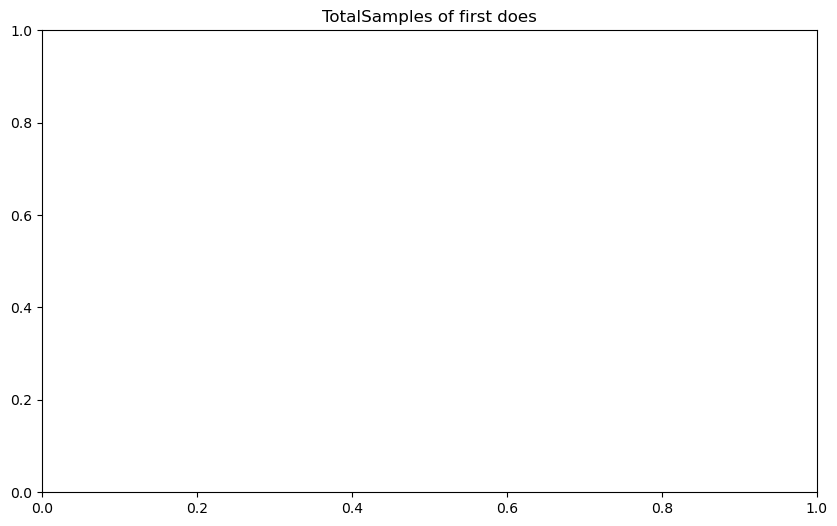

In [20]:
plt.figure(figsize=(10,6))

plt.title("TotalSamples of first does")
sns.barplot(x=df_vaccine["State"], y=df_vaccine['First Dose Administered'])
plt.xticks(rotation=90)

plt.ylabel("TotalSamples")

KeyError: 'State'

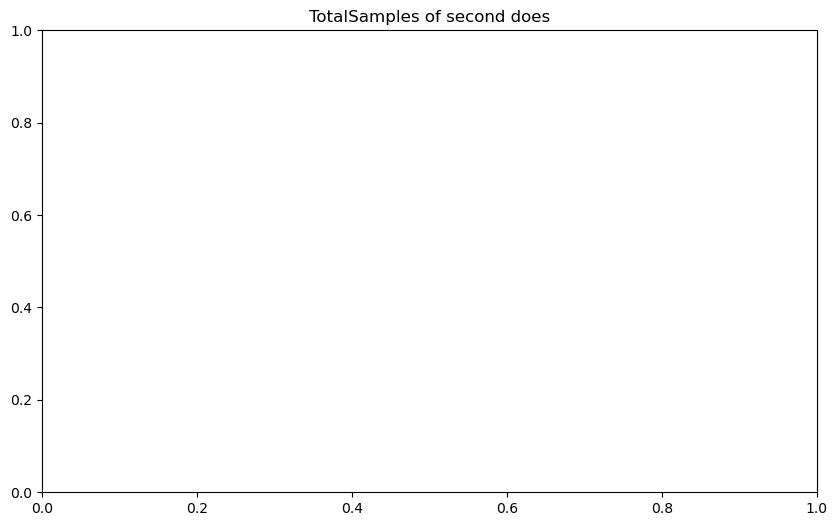

In [21]:
plt.figure(figsize=(10,6))

plt.title("TotalSamples of second does")
sns.barplot(x=df_vaccine["State"], y=df_vaccine['Second Dose Administered'])
plt.xticks(rotation=90)

plt.ylabel("TotalSamples")

In [22]:
total_male = df_vaccine['Male (Doses Administered)'].sum()

KeyError: 'Male (Doses Administered)'

In [23]:
total_male

NameError: name 'total_male' is not defined

In [24]:
total_female = df_vaccine['Female (Doses Administered)'].sum()

KeyError: 'Female (Doses Administered)'

In [25]:
total_female

NameError: name 'total_female' is not defined

In [26]:
statewise_male = df_vaccine.groupby(["State"])['Male (Doses Administered)'].max().sort_values(ascending=False)

KeyError: 'State'

In [27]:
statewise_male

NameError: name 'statewise_male' is not defined

In [28]:
plt.bar(df_vaccine['State'],df_vaccine['Male (Doses Administered)'], color = "Yellow")
plt.xticks(rotation = 90)
plt.title("Statewise male doeses")
plt.show()

KeyError: 'State'

In [29]:
statewise_female = df_vaccine.groupby(["State"])['Female (Doses Administered)'].max().sort_values(ascending=False)
statewise_female

KeyError: 'State'

In [30]:
plt.bar(df_vaccine['State'],df_vaccine['Female (Doses Administered)'], color = "Red")
plt.xticks(rotation = 90)
plt.title("Statewise Female doeses")
plt.show()

KeyError: 'State'

In [31]:
male= df_vaccine["Male(Individuals Vaccinated)"].sum()
female= df_vaccine["Female(Individuals Vaccinated)"].sum()
px.pie(names=["Male","Female"], values=[male,female], title="Male and Female Vaccination")

KeyError: 'Male(Individuals Vaccinated)'

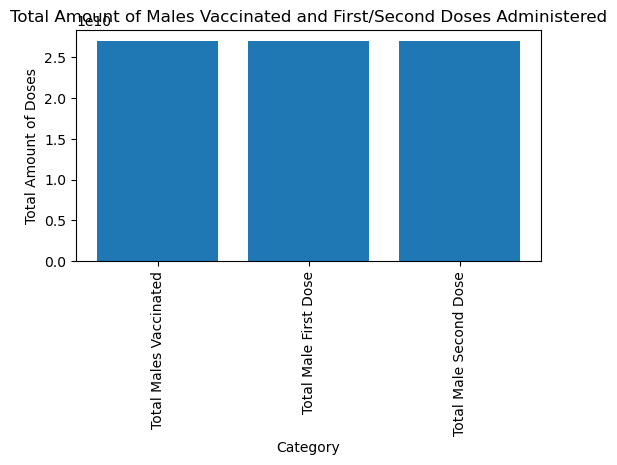

In [34]:
total_male_vaccinated = df_vaccine['Male (Doses Administered)'].sum()
total_male_first_dose = df_vaccine['Male (Doses Administered)'].sum()
total_male_first_dose = df_vaccine['Male (Doses Administered)'].sum()
categories = ['Total Males Vaccinated', 'Total Male First Dose', 'Total Male Second Dose']
values = [total_male_vaccinated, total_male_first_dose, total_male_first_dose]
plt.figure(figsize=(6, 3))
plt.bar(categories, values)
plt.title("Total Amount of Males Vaccinated and First/Second Doses Administered")
plt.xlabel("Category")
plt.xticks(rotation=90)
plt.ylabel("Total Amount of Doses")
plt.show()